# Decision Tree for Wine Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Data Loading and Cleaning

In [2]:
from sklearn import datasets
df = pd.read_csv('winequality-red.csv')

def myfunction(x):
    if x > 5:
        return 1
    else:
        return 0
df['quality'] = df['quality'].apply(myfunction)


# 1. Decision Tree with All Features

In [3]:
data = df.iloc[:,0:-1] # independent variables
target = df['quality']  # dependent variable: y

import datetime
begin_time = datetime.datetime.now()

# import train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 42,test_size=0.25)

# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

# instantiate a decision tree model. All parameters can be omited to use default ones.
# details please check https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt = DecisionTreeClassifier(max_depth= 4, random_state = 42) 
dt.fit(x_train, y_train) # train our model
y_pred = dt.predict(x_test) # let the model predict the test data

from sklearn.metrics import accuracy_score
print('Accuracy score for Decision Tree (all features): ',accuracy_score(y_test, y_pred))

print('Training Duration (1 run): ',datetime.datetime.now()-begin_time)

Accuracy score for Decision Tree (all features):  0.715
Training Duration (1 run):  0:00:00.008996


## Confusion Matrix for Decision Tree (All Features)

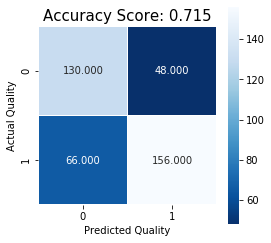

In [4]:
from sklearn.metrics import confusion_matrix
#confusion_matrix (y_test, y_pred, labels = [1,0])

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Quality');
plt.xlabel('Predicted Quality');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

## Compute average Training Duration and accuracy score over 100 runs for Decision Tree (all features)

In [5]:
def decTreeScoreall():
    begin_time = datetime.datetime.now()
    x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 42,test_size=0.25)
    dt = DecisionTreeClassifier(max_depth =4, random_state = 42)
    dt.fit(x_train, y_train) 
    y_pred = dt.predict(x_test)
    return accuracy_score(y_test, y_pred),datetime.datetime.now()-begin_time  

In [6]:
runs = 100 #to loop through and get average timing,and average accuracy to be more accurate
totaltime = datetime.timedelta()
totalaccuracy =0.00
for i in np.arange(0, runs, 1):
    i, j = decTreeScoreall()
    totaltime = totaltime + j
    totalaccuracy = totalaccuracy + i 

print('Average Training Duration for decision tree processing:',totaltime/runs)
print('Average accuracy for decision tree processing:',totalaccuracy/runs)

Average Training Duration for decision tree processing: 0:00:00.006240
Average accuracy for decision tree processing: 0.7150000000000019


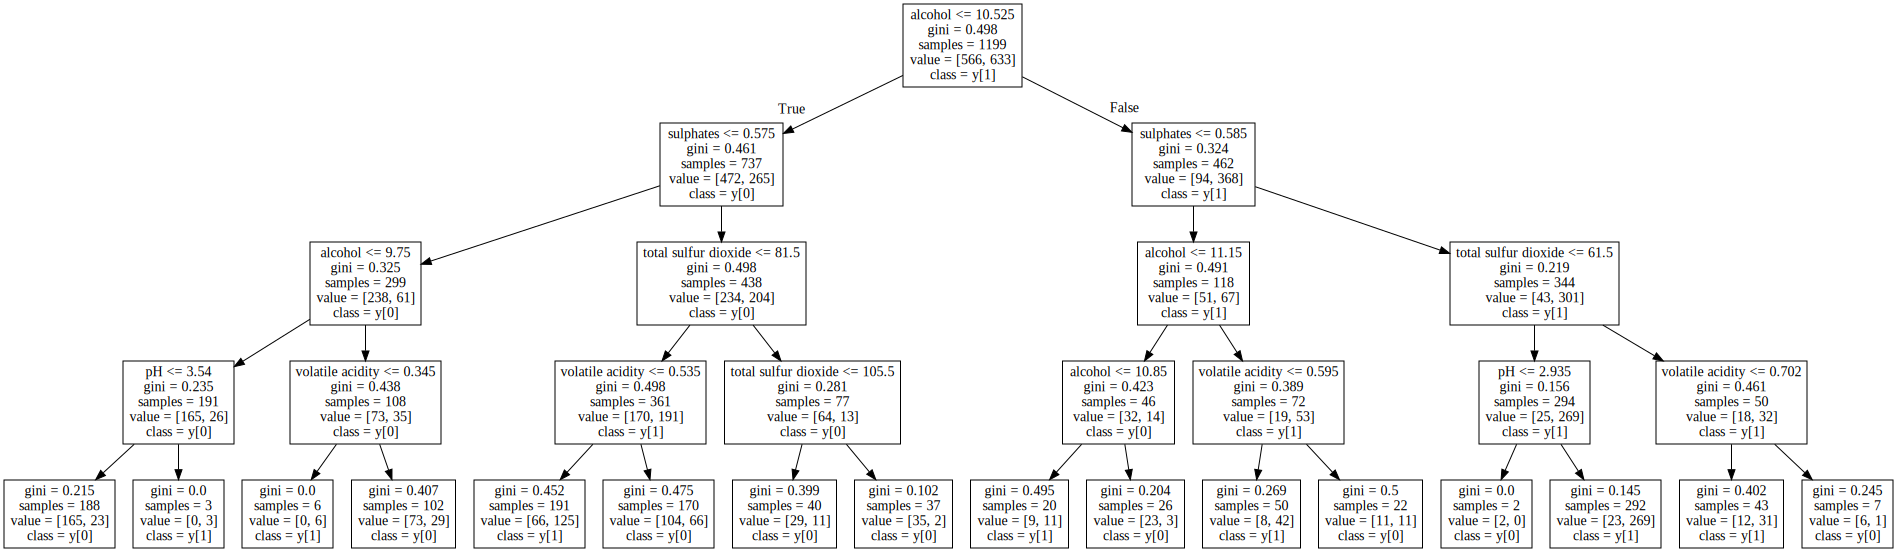

In [7]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns)) # display the tree, with no output file

# 2. Decision Tree with Four Features (Pearson Correlation)

In [8]:
data1 = df.loc[:,['volatile acidity','total sulfur dioxide', 'sulphates', 'alcohol']] # independent variables
target1 = df['quality']  # dependent variable: y
data1.head()

,volatile acidity,total sulfur dioxide,sulphates,alcohol
0,0.70,34.0,0.56,9.4
1,0.88,67.0,0.68,9.8
2,0.76,54.0,0.65,9.8
3,0.28,60.0,0.58,9.8
4,0.70,34.0,0.56,9.4


In [9]:
from sklearn.model_selection import train_test_split
import datetime

begin_time = datetime.datetime.now()

x1_train, x1_test, y1_train, y1_test = train_test_split(data1, target1, random_state = 42,test_size=0.25)

# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth =4,random_state = 42)
dt.fit(x1_train, y1_train) # train our model
y1_pred = dt.predict(x1_test) # let the model predict the test data

from sklearn.metrics import accuracy_score
print('Accuracy Score for Decision Tree (4 features): ',accuracy_score(y1_test, y1_pred))

print('Training Duration (1 run): ',datetime.datetime.now()-begin_time)

Accuracy Score for Decision Tree (4 features):  0.7125
Training Duration (1 run):  0:00:00.011992


## Confusion Matrix for Decision Tree (4 Features)

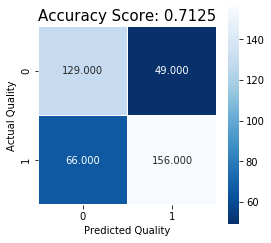

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(4,4))
sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Quality');
plt.xlabel('Predicted Quality');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y1_test, y1_pred))
plt.title(all_sample_title, size = 15);

## Compute average Training Duration and accuracy score over 100 runs for Decision Tree (4 features)

In [11]:

def decTreeScorepc4():
    begin_time = datetime.datetime.now()
    x1_train, x1_test, y1_train, y1_test = train_test_split(data1, target1, random_state = 42)

    dt = DecisionTreeClassifier(max_depth =4, random_state = 42)
    dt.fit(x1_train, y1_train) 

    y1_pred = dt.predict(x1_test)
    accuracy=accuracy_score(y1_test, y1_pred)
    timespent=datetime.datetime.now()-begin_time
    return accuracy,timespent  

runs = 10 #to loop through and get average timing,and average accuracy to be more accurate
totaltime = datetime.timedelta()
totalaccuracy =0.00
for i in np.arange(0, runs, 1):
    i, j = decTreeScorepc4()
    totaltime = totaltime + j
    totalaccuracy = totalaccuracy + i 

print('Average Accuracy Score for decision tree processing (4 features):',totalaccuracy/runs)
print('Average Training Duration for decision tree processing (4 features):',totaltime/runs)


Average Accuracy Score for decision tree processing (4 features): 0.7125000000000001
Average Training Duration for decision tree processing (4 features): 0:00:00.005997


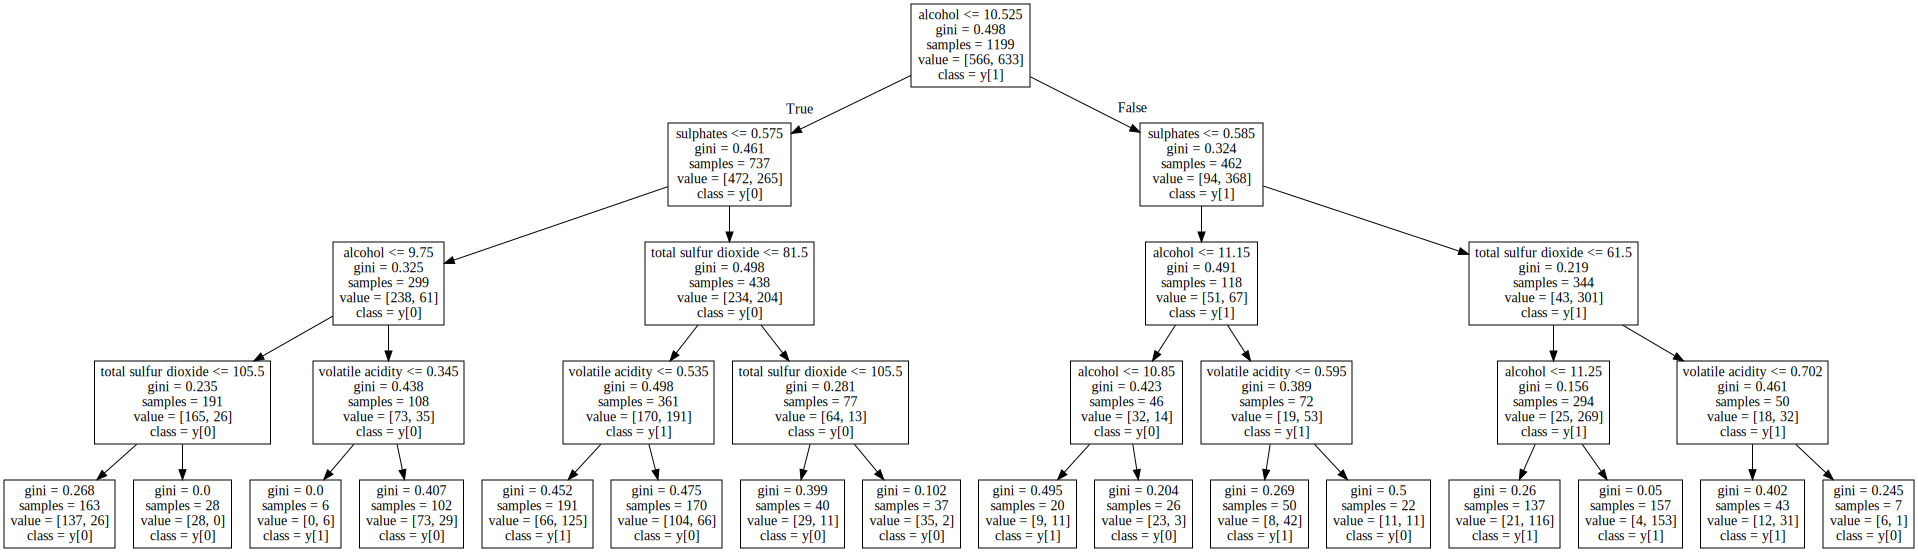

In [12]:
Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x1_train.columns))

# 3. Decision Tree with PCA (6 components)

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

x = StandardScaler().fit_transform(df.iloc[:,0:-1])

pca1 = PCA(n_components=6)
x2 = pca1.fit_transform(x)
y2 = df['quality']  


begin_time = datetime.datetime.now()
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, random_state = 42,test_size=0.25)

dt = DecisionTreeClassifier(max_depth =4, random_state = 42) 
dt.fit(x2_train, y2_train) 

y2_pred = dt.predict(x2_test)

from sklearn.metrics import accuracy_score
print('Accuracy Score for Decision Tree (6 components): ',accuracy_score(y2_test, y2_pred))

print('Training Duration (1 run): ',datetime.datetime.now()-begin_time)

Accuracy Score for Decision Tree (6 components):  0.6675
Training Duration (1 run):  0:00:00.007996


## Confusion Matrix for Decision Tree with PCA (6 components)

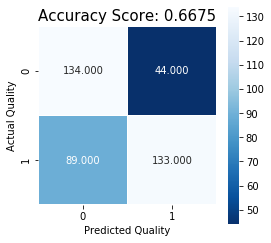

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(4,4))
sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Quality');
plt.xlabel('Predicted Quality');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y2_test, y2_pred))
plt.title(all_sample_title, size = 15);

## Compute average Training Duration and accuracy score over 100 runs for Decision Tree with PCA (6 components)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def decTreeScorepca6():
    begin_time = datetime.datetime.now()
    x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, random_state = 42,test_size=0.25)

    dt = DecisionTreeClassifier(max_depth =4, random_state = 42) 
    dt.fit(x2_train, y2_train) 

    y2_pred = dt.predict(x2_test)
    accuracy=accuracy_score(y2_test, y2_pred)
    timespent=datetime.datetime.now()-begin_time
    return accuracy,timespent

runs = 100
totaltime = datetime.timedelta()
totalaccuracy =0.00
for i in np.arange(0, runs, 1):
    i, j = decTreeScorepca6()
    totaltime = totaltime + j
    totalaccuracy = totalaccuracy + i   

print('Average Accuracy Score for Decision Tree (6 Principal Components): ', totalaccuracy/runs)
print('Average Training Duration for Decision Tree (6 Principal Components): ', totaltime/runs)

Average Accuracy Score for Decision Tree (6 Principal Components):  0.6674999999999989
Average Training Duration for Decision Tree (6 Principal Components):  0:00:00.004767


# From the 3 models above, the decision tree with above 20% correlation (pearson correlation)with default settings, yields the best efficiency and accuracy, among the 3.

### Next, we will review the hyper parameters within the decision Tree (4 features):

In [16]:
data1 = df.loc[:,['volatile acidity','total sulfur dioxide', 'sulphates', 'alcohol']] # independent variables
target1 = df['quality']  # dependent variable: y
data1

# import train_test_split
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(data1, target1, random_state = 42,test_size=0.25)

# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def decTreeScorepc(crit = 'entropy',maxDepth = None, minSamples = 3, minSplit = 3,random_state = 42):
    begin_time = datetime.datetime.now()
    x1_train, x1_test, y1_train, y1_test = train_test_split(data1, target1, random_state = 42)

    dt = DecisionTreeClassifier(criterion = crit, max_depth = maxDepth, min_samples_leaf = minSamples, 
                                 min_samples_split = minSplit, random_state= 42)
    dt.fit(x1_train, y1_train) 

    y1_pred = dt.predict(x1_test)
    accuracy=accuracy_score(y1_test, y1_pred)
    timespent=datetime.datetime.now()-begin_time
    return accuracy,timespent  

runs = 100 #to loop through and get average timing,and average accuracy to be more accurate
totaltime = datetime.timedelta()
totalaccuracy =0.00
for i in np.arange(0, runs, 1):
    i, j = decTreeScorepc()
    totaltime = totaltime + j
    totalaccuracy = totalaccuracy + i 

print('Average Accuracy Score for decision tree processing (4 features):',totalaccuracy/runs)
print('Average Training Duration for decision tree processing (4 features):',totaltime/runs)

Average Accuracy Score for decision tree processing (4 features): 0.7124999999999997
Average Training Duration for decision tree processing (4 features): 0:00:00.006786


# Hyper parameter 1: Criterion

In [17]:
accuracy, time = decTreeScorepc(crit = 'gini',maxDepth = None, minSamples = 3, minSplit = 3,random_state = 42)
print(accuracy)
print(time)

0.6925
0:00:00.008996


# Criterion is to set as 'Entropy'

# Hyper parameter 2: Max Depth

In [18]:
for i in np.arange(1, 15, 1): #1 to 14
    accuracy, time = decTreeScorepc(maxDepth = i)
    print("Accuracy when max depth :",i,"=",accuracy)
    
# when maximum depth allowed is 10, the accuracy score is highest. 

Accuracy when max depth : 1 = 0.66
Accuracy when max depth : 2 = 0.66
Accuracy when max depth : 3 = 0.705
Accuracy when max depth : 4 = 0.7175
Accuracy when max depth : 5 = 0.705
Accuracy when max depth : 6 = 0.7175
Accuracy when max depth : 7 = 0.695
Accuracy when max depth : 8 = 0.7075
Accuracy when max depth : 9 = 0.71
Accuracy when max depth : 10 = 0.72
Accuracy when max depth : 11 = 0.7025
Accuracy when max depth : 12 = 0.72
Accuracy when max depth : 13 = 0.7075
Accuracy when max depth : 14 = 0.7125


# Max Depth is to set as '4'

# Hyper parameter 3: min_samples_leaf

In [19]:
for i in np.arange(1, 15, 1):
    accuracy, time = decTreeScorepc(minSamples = i)
    print("Accuracy when min samples is",i,"=",accuracy)
    
# when the minimum samples allowed in a leaf is 1, the accuracy score is the highest

Accuracy when min samples is 1 = 0.735
Accuracy when min samples is 2 = 0.7225
Accuracy when min samples is 3 = 0.7125
Accuracy when min samples is 4 = 0.6675
Accuracy when min samples is 5 = 0.6875
Accuracy when min samples is 6 = 0.6625
Accuracy when min samples is 7 = 0.69
Accuracy when min samples is 8 = 0.695
Accuracy when min samples is 9 = 0.715
Accuracy when min samples is 10 = 0.7125
Accuracy when min samples is 11 = 0.7275
Accuracy when min samples is 12 = 0.72
Accuracy when min samples is 13 = 0.7325
Accuracy when min samples is 14 = 0.7375


# min_samples_leaf is to set as 1

# Hyper parameter 4: min_samples_split

In [20]:
for i in np.arange(2, 15,1): 
    accuracy, time = decTreeScorepc(minSplit = i)
    print("Accuracy when minSplit is",i,"=",accuracy)
    
# when the minimum split allowed is 2, the accuracy score is the highest

Accuracy when minSplit is 2 = 0.7125
Accuracy when minSplit is 3 = 0.7125
Accuracy when minSplit is 4 = 0.7125
Accuracy when minSplit is 5 = 0.7125
Accuracy when minSplit is 6 = 0.7125
Accuracy when minSplit is 7 = 0.7175
Accuracy when minSplit is 8 = 0.7175
Accuracy when minSplit is 9 = 0.7175
Accuracy when minSplit is 10 = 0.715
Accuracy when minSplit is 11 = 0.695
Accuracy when minSplit is 12 = 0.6975
Accuracy when minSplit is 13 = 0.6975
Accuracy when minSplit is 14 = 0.7075


# min_samples_split is to set as 2.

# Best combination of hyper parameters:

In [21]:
## Criterion is to set as 'Entropy'
## max_depth is to set as 4
## min_samples_leaf is to set as 1
## min_samples_split is to set as 2

In [22]:
data1 = df.loc[:,['volatile acidity','total sulfur dioxide', 'sulphates', 'alcohol']] # independent variables
target1 = df['quality']  # dependent variable: y
data1

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data1, target1, random_state = 42,test_size=0.25)

# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy',  max_depth = 4, min_samples_leaf = 1, min_samples_split = 2, random_state = 42)
dt.fit(X_train, Y_train) # train our model
Y_pred = dt.predict(X_test) # let the model predict the test data

from sklearn.metrics import accuracy_score
print('Accuracy Score for Decision Tree (best combination): ',accuracy_score(Y_test, Y_pred))
print('Training Duration (best combination): ',datetime.datetime.now()-begin_time)


Accuracy Score for Decision Tree (best combination):  0.7175
Training Duration (best combination):  0:00:01.989890


In [23]:
def decTreeScorebest(crit = 'entropy',  maxDepth = 4, minSamples = 1, minSplit = 2, random_state = 42):
    begin_time = datetime.datetime.now()
    dt = DecisionTreeClassifier(criterion = crit, max_depth = maxDepth, min_samples_leaf = minSamples, 
                                 min_samples_split = minSplit, random_state= 42) 
    dt.fit(X_train, Y_train) # train our model
    Y_pred = dt.predict(X_test) # let the model predict the test data
    accuracy = accuracy_score(Y_test, Y_pred)
    timespent = datetime.datetime.now()-begin_time
    return accuracy,timespent

runs = 100
totaltime = datetime.timedelta()
totalaccuracy =0.00
for i in np.arange(0, runs, 1):
    i, j = decTreeScorebest()
    totaltime = totaltime + j
    totalaccuracy = totalaccuracy + i   

print('Average Accuracy Score for Decision Tree (best combination)): ', totalaccuracy/runs)
print('Average Training Duration for Decision Tree (best combination): ', totaltime/runs)


Average Accuracy Score for Decision Tree (best combination)):  0.7175000000000007
Average Training Duration for Decision Tree (best combination):  0:00:00.003621


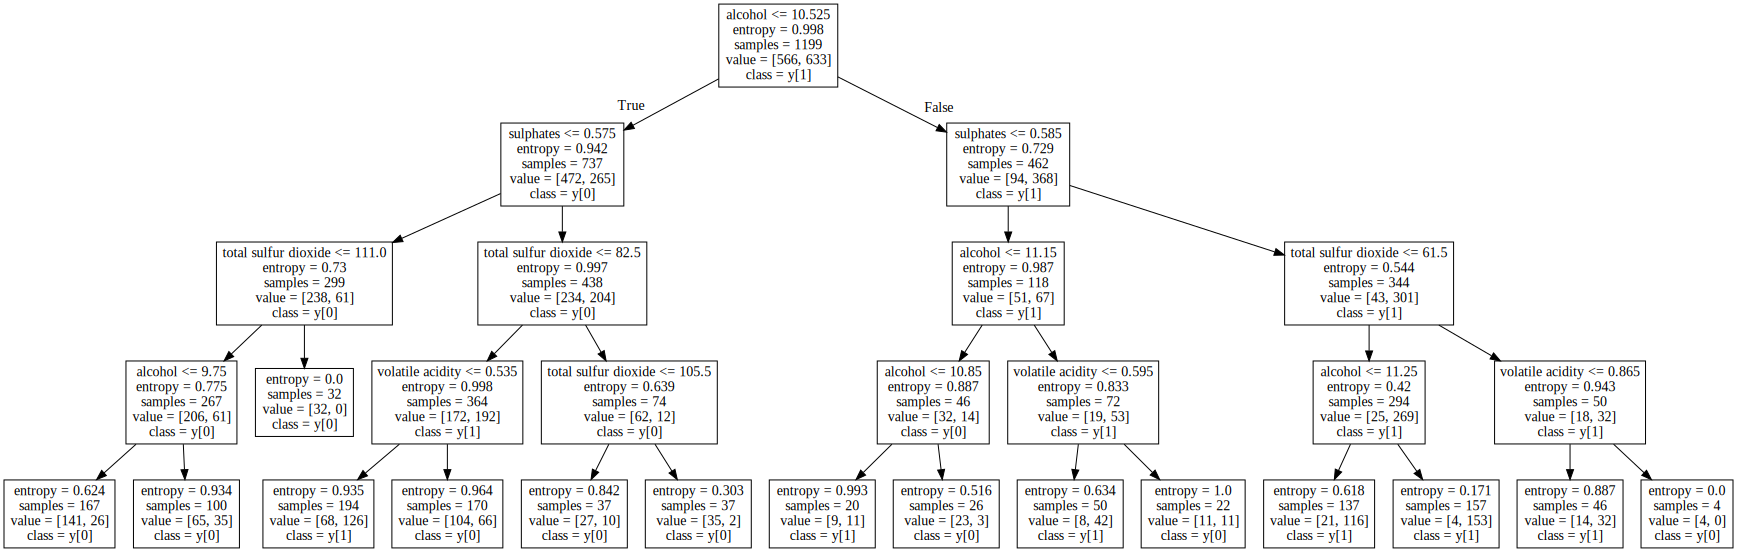

In [27]:
Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= X_train.columns))